<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

**Описание проекта**


Нужно защитить данные клиентов страховой компании. Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Защититим данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

**Описание данных**


Набор данных находится в файле insurance.csv.

*Признаки*:

- *Пол* — пол застрахованного клиента
- *Возраст* — его возраст
- *Зарплата* — его зарплата
- *Члены семьи* — количество членов его семьи


*Целевой признак*:

- *Страховые выплаты* — количество страховых выплат клиенту за последние 5 лет

## Загрузка данных

Для начала импортируем библиотеки

In [1]:
# импорты из стандартной библиотеки
import warnings

# импорты сторонних библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# импорты модулей текущего проекта
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# настройки
warnings.filterwarnings("ignore")

# константы
RANDOM_STATE = 12345

Загрузим данные и изучим их

In [2]:
try:
    insurance_data = pd.read_csv('insurance.csv')
except:
    insurance_data = pd.read_csv('/datasets/insurance.csv')

In [3]:
insurance_data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


На первый взгляд проблем *немного*:

1. Переименовать названия столбцов в *snake_case*
2. Признаки "Возраст" и "Зарплата" могут быть переведены в тип данных *int*

In [5]:
insurance_data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

In [6]:
# отлично
insurance_data.columns

Index(['gender', 'age', 'salary', 'family_members', 'insurance_payments'], dtype='object')

Теперь приведем признаки age и salary к типу данных int

In [7]:
insurance_data['age'] = insurance_data['age'].astype('int')
insurance_data['salary'] = insurance_data['salary'].astype('int')

In [8]:
# отлично
insurance_data.head()

,gender,age,salary,family_members,insurance_payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


Посмотрим есть ли подозрительные вещи (выбросы)

In [9]:
# на всякий случай можно попробовать взглянуть на все столбцы кроме gender
insurance_data.describe()

,gender,age,salary,family_members,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [10]:
sns.set(rc={'figure.figsize':(11, 5)})

<AxesSubplot:xlabel='salary', ylabel='Count'>

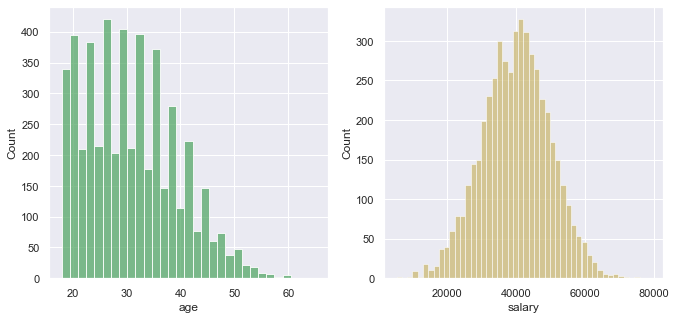

In [11]:
fig, ax = plt.subplots(1,2)
sns.histplot(data=insurance_data['age'], color='g', ax=ax[0])
sns.histplot(data=insurance_data['salary'], color='y', ax=ax[1])

<AxesSubplot:xlabel='insurance_payments', ylabel='Count'>

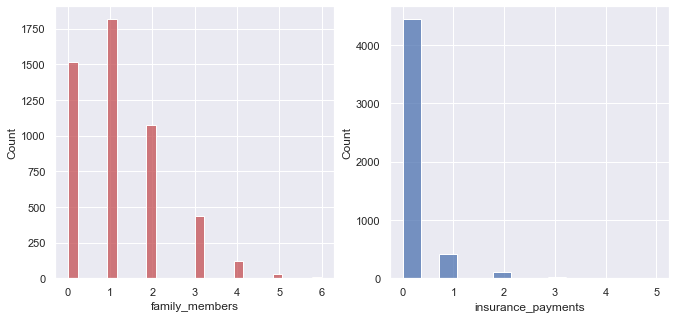

In [12]:
fig, ax = plt.subplots(1,2)
sns.histplot(data=insurance_data['family_members'], color='r', ax=ax[0])
sns.histplot(data=insurance_data['insurance_payments'], color='b', ax=ax[1])

Вроде бы все нормально, правда в insurance_payments есть одно значение 5, думаю можно его удалить.

Также можно удалить строки в столбце family_members == 6 их тоже очень мало, можно посчитать за выброс

In [13]:
insurance_data[insurance_data['insurance_payments'] == 5]

,gender,age,salary,family_members,insurance_payments
228,1,65,39700,1,5


In [14]:
# удалим выбросы
insurance_data = insurance_data.drop(index=228).reset_index(drop=True)
insurance_data = insurance_data[insurance_data['family_members'] != 6]

проверим, есть ли дубликаты в данных

In [15]:
# Аж 153 случая, удалим их
insurance_data.duplicated().sum()

153

In [16]:
# отлично
insurance_data = insurance_data[~insurance_data.duplicated()].reset_index(drop=True)
insurance_data.shape[0]

4839

Посмотрим на корреляцию признаков:

<AxesSubplot:>

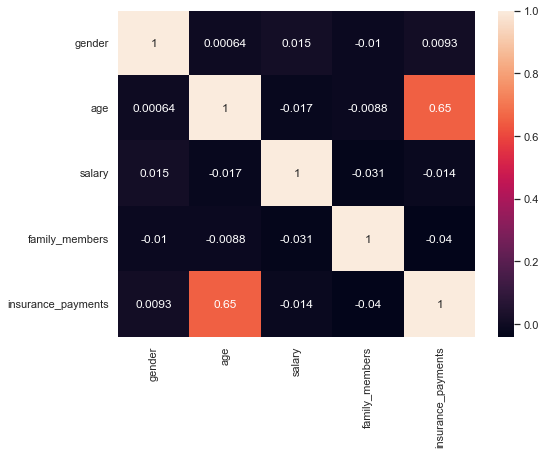

In [17]:
sns.set(rc={'figure.figsize':(8, 6)})

sns.heatmap(data=insurance_data.corr(), annot=True)

Заметна корреляция между признаками insurance_payments и age (0.65).

Это, вроде бы, много, но, вроде бы, и нет! Это не похоже на явную линейную зависимость одного признака от другого, думаю, удалять один признак не нужно.

**Промежуточный вывод**:
- данные открыты и изучены
- названия признаков были преодразованы в snake_case
- признаки age и salary приведены к типу int
- удалены выбросы из признаков family_members и insurance_payments
- удалены дубликаты
- найдена корелляция между признаками insurance_payments и age (0.65)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

В этом пункте **ответим на вопрос** и **обоснуем решение**.


Признаки умножают на обратимую матрицу. *Изменится ли качество линейной регрессии?* (Её можно обучить заново.)
1. Изменится. Приведите примеры матриц.
2. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Умножим признаки на обратимую матрицу P, получим:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$


Раскроекм скобки с помощью:

$$
(AB)^T = B^T A^T
$$

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Получается, что:

$$
w' = (P^T (X^TX) P)^{-1} (XP)^T y = 
$$

$$
= P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Тогда вспомним, что:

$$
A A^{-1} = A^{-1} A = E
$$

$$
AE = EA = A
$$

И наконец:

$$
w' = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Если в формуле предсказания X домножить на P и подставть полученный результат, получим, что:

$$
a' = X (P P^{-1}) w' = Xw = a
$$

**Ответ:** Не изменится

**Обоснование:** Обратимая матрица умножится на обратную и превратится в единичную, обоснование выше.

## Алгоритм преобразования

**Алгоритм**

1. Разделим датасет на признаки (X) и таргет (y) с помощью `train_test_split`
2. Сгенерируем случайную квадратную обратимую матрицу (размером n x n, где n = кол-во признаков, на которых обучается модель)
3. Проверим, обратимая ли она
4. Если обратимая, то умножим матрицу признаков (X) на случайную квадратную обратимую матрицу
5. Если не обратимая, то вернемся к пункту 2
6. Проверим качество модели с помощью R2-score

Но для начала еще немного подготовим данные

In [18]:
# есть дисбаланс мультиклассов
insurance_data.insurance_payments.value_counts(normalize=True)

0    0.884067
1    0.087208
2    0.023559
3    0.003720
4    0.001447
Name: insurance_payments, dtype: float64

In [19]:
# делим на признаки и таргет
X = insurance_data.drop('insurance_payments', axis=1)
y = insurance_data['insurance_payments']

In [20]:
# stratify=y для того чтобы сохранить отношение классов друг к другу
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_STATE)

In [21]:
# нормас
y_train.value_counts(normalize=True)

0    0.883990
1    0.087076
2    0.023698
3    0.003858
4    0.001378
Name: insurance_payments, dtype: float64

Т.к. будем использовать линейную регрессию, важно провести масштабирование признаков, используем скелер

In [22]:
# численные признаки
num_features = ['age', 'salary']

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
X_train[num_features] = scaler.fit_transform(X_train[num_features])

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
X_test[num_features] = scaler.transform(
    X_test[num_features]
)

Запаримся и закодируем признак family_members

In [23]:
X_train = pd.get_dummies(data=X_train, columns=['family_members'], drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=['family_members'], drop_first=True)

In [24]:
X_test.head()

,gender,age,salary,family_members_1,family_members_2,family_members_3,family_members_4,family_members_5
2447,1,-1.415449,-0.057058,0,0,0,0,0
969,0,-0.001299,-0.598589,0,0,0,0,0
4713,1,-0.001299,0.935748,0,1,0,0,0
2466,0,-0.708374,-0.016945,0,0,1,0,0
4682,0,-0.826220,-0.418079,1,0,0,0,0


Напишем теперь функцию personal_data_cypher:

In [25]:
def personal_data_cypher(X_train: pd.DataFrame, X_test: pd.DataFrame) -> np.array:
    """Функция шифрует персональные данные пользователей умножая исходные матрицы признаков на случайную обратимую квадратную матрицу 

    Args:
        X_train (pd.DataFrame): Матрица признаков пользователей train выборки
        X_test (pd.DataFrame): Матрица признаков пользователей test выборки

    Returns:
        np.array: Зашифрованные матрицы признаков пользователей
    """

    # используем цикл while для проверки матрицы на обратимость
    while True:
        
        # генерируем случайную обратимую матрицу n x n
        n = X_train.shape[1]
        m = np.random.rand(n, n)
        mx = np.sum(np.abs(m), axis=1)
        np.fill_diagonal(m, mx)

        # проводим проверку матрицы на обратимость
        try:
            minv = np.linalg.inv(m)
            break

        except:
            continue

    # кодируем матрицы
    X_train_cyphed = X_train.values @ m
    X_test_cyphed = X_test.values @ m

    # возвращаем закодированные матрицы признаков
    return X_train_cyphed, X_test_cyphed

**Обоснование**

При таком подходе данные будут надежно защищены, при каждом новом вызове функции исходная матрица признаков умножается на случайную квадратную обратимую матрицу матрицу. Не уверен, насколько это хорошая идея.

**Промежуточный вывод**:
- разделили данные с помощью train_test_split
- признаки age и salary масштабировали с помощью StandartScaler
- закодировали признак family_members с помощью get_dummies
- объявили функцию personal_data_cypher для кодирования матриц признаков

## Проверка алгоритма

Обучим линейную регрессию на незакодированных и закодированных признаках и сравним результаты.

In [26]:
lr_model = LinearRegression()

# незашифрованные признаки
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# зашифрованные признаки
X_train_cyphed, X_test_cyphed = personal_data_cypher(X_train, X_test)
lr_model.fit(X_train_cyphed, y_train)
y_pred_cyphed = lr_model.predict(X_test_cyphed)

print('Предсказания на незакодированных данных:\n', y_pred, '\n')
print('Предсказания на закодированных данных:\n', y_pred_cyphed)
print('-----------------------------------------------------------------')
print(f'R2-score на незакодированных данных : {r2_score(y_test, y_pred)}')
print(f'R2-score на закодированных данных   : {r2_score(y_test, y_pred_cyphed)}')

Предсказания на незакодированных данных:
 [-0.2588463   0.16725127  0.14265055 ...  0.0868444   0.09173883
  0.27762532] 

Предсказания на закодированных данных:
 [-0.2588463   0.16725127  0.14265055 ...  0.0868444   0.09173883
  0.27762532]
-----------------------------------------------------------------
R2-score на незакодированных данных : 0.41079523611614066
R2-score на закодированных данных   : 0.41079523611614066


**промежуточный вывод**:
- обучили линейную регрессию на незакодированных данных (R2-score 0.41079523611614066)
- обучили линейную регрессию на закодированных данных (R2-score 0.41079523611614066)
- сделали вывод о том, что, действительно, такой способ защитить персональные данные пользователей работает

## Общий вывод

**Загрузка данных**:

- данные открыты и изучены
- названия признаков были преодразованы в snake_case
- признаки age и salary приведены к типу int
- удалены выбросы из признаков family_members и insurance_payments
- удалены дубликаты
- найдена корелляция между признаками insurance_payments и age (0.65)


**Умножение матриц**:

- выяснили, что качетсво линейной регресси после кодирования матрицы признаков *не изменится*
- обосновали применение такого метода математически


**Алгоритм преобразования**:

- разделили данные с помощью train_test_split
- признаки age и salary масштабировали с помощью StandartScaler
- закодировали признак family_members с помощью get_dummies
- объявили функцию personal_data_cypher для кодирования матриц признаков


**Проверка алгоритма**:

- обучили линейную регрессию на незакодированных данных (R2-score 0.41079523611614066)
- обучили линейную регрессию на закодированных данных (R2-score 0.41079523611614066)
- сделали вывод о том, что, действительно, такой способ защитить персональные данные пользователей работает